# Load the Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import chi2_contingency 
import researchpy as rp
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

# Load the Dataset

In [3]:
df=pd.read_csv('C:/Users/seagu/Downloads/car.csv',na_values='')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df.info()
print("The shape of the dataset is {} rows and {} columns".format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
The shape of the dataset is 398 rows and 8 columns


# Data Cleaning

In [5]:
# check for unique value
def check_data_unique(df):
    for column in df.columns:
        uniques = df[column].unique()
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:10])
check_data_unique(df)

MPG                    129	 [18. 15. 16. 17. 14. 24. 22. 21. 27. 26.]
Cylinders                5	 [8 4 6 3 5]
Displacement            82	 [307. 350. 318. 304. 302. 429. 454. 440. 455. 390.]
Horsepower              94	 ['130' '165' '150' '140' '198' '220' '215' '225' '190' '170']
Weight                 351	 [3504 3693 3436 3433 3449 4341 4354 4312 4425 3850]
Acceleration            95	 [12.  11.5 11.  10.5 10.   9.   8.5  8.   9.5 15. ]
Model Year              13	 [70 71 72 73 74 75 76 77 78 79]
US Made                  2	 [1 0]


In [6]:
#Horsepower is under object type, so lets check the unique value in horsepower
df.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [4]:
# change '?' in Horsepower into 'NaN'
df['Horsepower']=df['Horsepower'].str.replace('?','NaN').astype(float)

In [69]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [8]:
#check for percentage of null value
null_df = df.isnull().sum() / df.shape[0] * 100
null_df

MPG             0.000000
Cylinders       0.000000
Displacement    0.000000
Horsepower      1.507538
Weight          0.000000
Acceleration    0.000000
Model Year      0.000000
US Made         0.000000
dtype: float64

In [5]:
#dealing with the missing value
#since there are some outliers exists in horsepower, we can imputate the missing value with median
df['Horsepower']= df['Horsepower'].fillna(df['Horsepower'].median())
df['Horsepower']=df['Horsepower'].astype(int)

In [10]:
#check the duplication
print('sum of duplicated values: {}\n'.format(df.duplicated().sum()))

sum of duplicated values: 0



# EDA

In [11]:
sns.set_style("whitegrid")

In [24]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


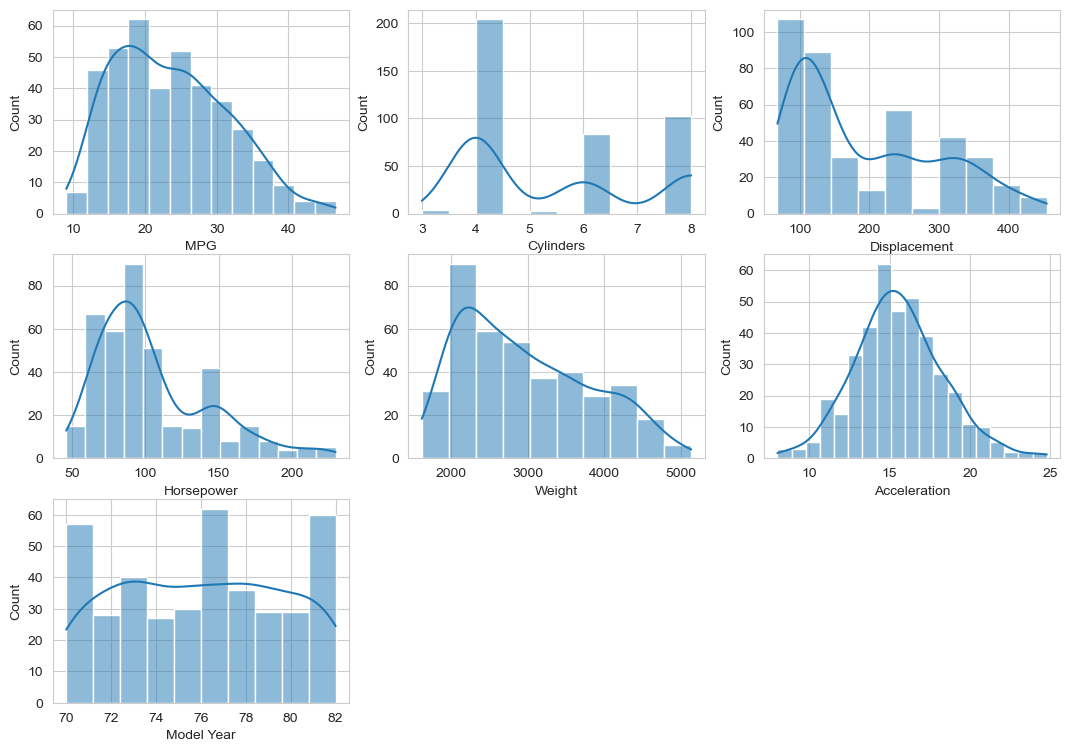

In [41]:
fig, axs = plt.subplots(3, 3, figsize=(13, 9))
fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])
# sns.histplot(data=df,bins=20)

sns.histplot(data=df, x="MPG", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="Cylinders", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Displacement", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="Horsepower", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="Weight", kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="Acceleration", kde=True,ax=axs[1, 2])
sns.histplot(data=df, x="Model Year", kde=True,ax=axs[2, 0])


plt.show()

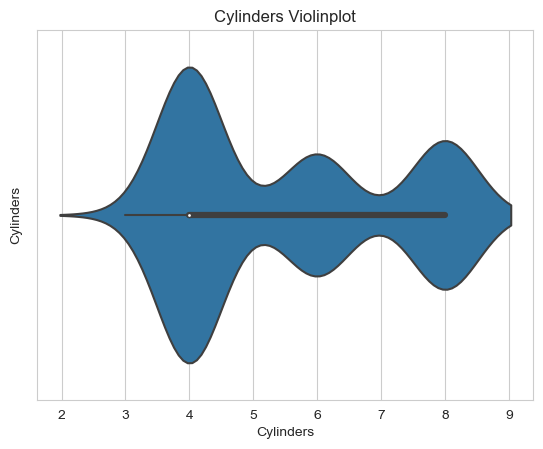

In [25]:
sns.violinplot(x='Cylinders', data = df)
plt.title("Cylinders Violinplot")
plt.ylabel('Cylinders')
plt.show()

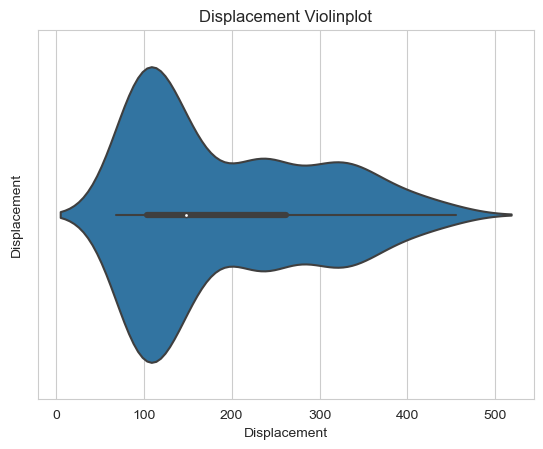

In [16]:
sns.violinplot(x='Displacement', data = df)
plt.title("Displacement Violinplot")
plt.ylabel('Displacement')
plt.show()

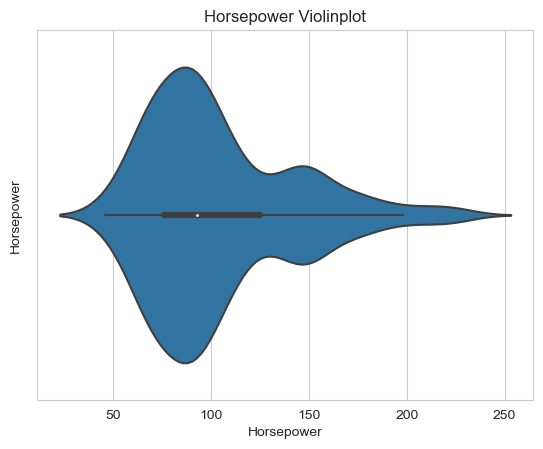

In [19]:
sns.violinplot(x='Horsepower', data = df)
plt.title("Horsepower Violinplot")
plt.ylabel('Horsepower')
plt.show()

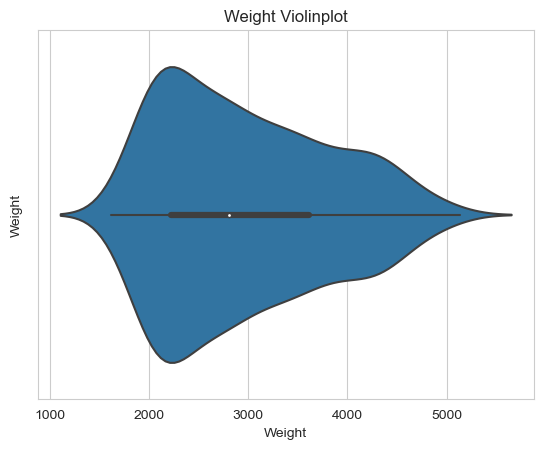

In [20]:
sns.violinplot(x='Weight', data = df)
plt.title("Weight Violinplot")
plt.ylabel('Weight')
plt.show()

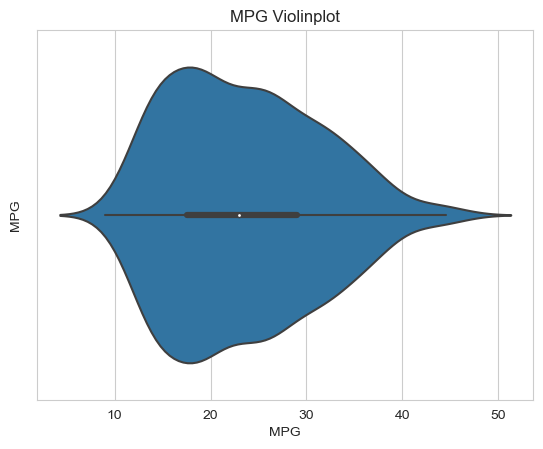

In [42]:
sns.violinplot(x='MPG', data = df)
plt.title("MPG Violinplot")
plt.ylabel('MPG')
plt.show()

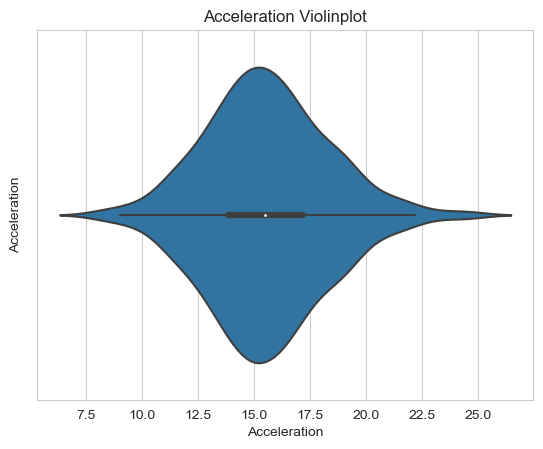

In [21]:
sns.violinplot(x='Acceleration', data = df)
plt.title("Acceleration Violinplot")
plt.ylabel('Acceleration')
plt.show()

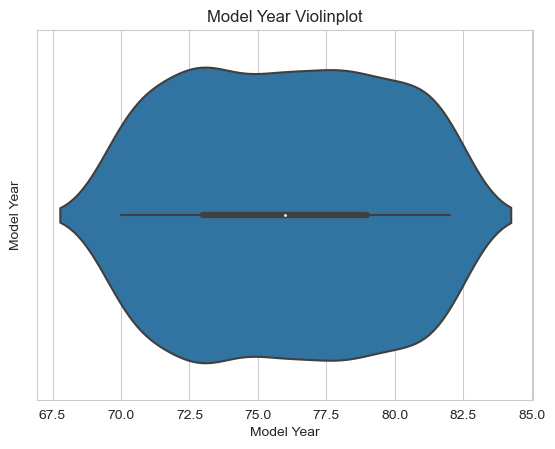

In [22]:
sns.violinplot(x='Model Year', data = df)
plt.title("Model Year Violinplot")
plt.ylabel('Model Year')
plt.show()

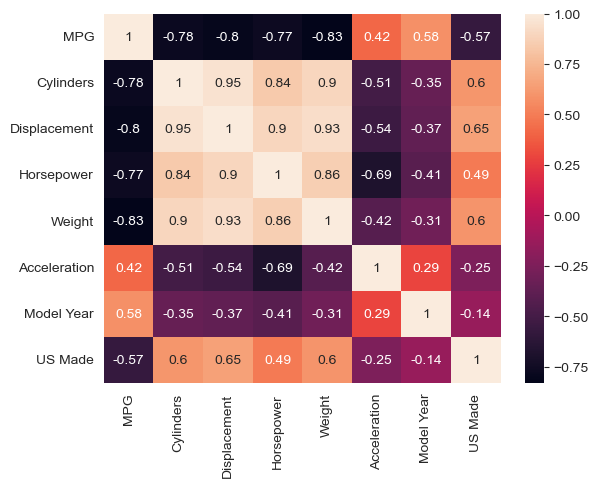

In [43]:
#correlation plot
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Categorical Variable Analysis

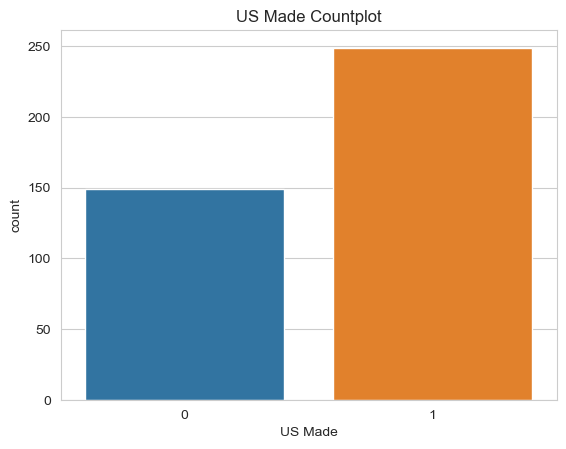

In [44]:
#Us made
sns.countplot(x='US Made',data=df)
plt.title("US Made Countplot")
plt.show()

# Model

In [6]:
from sklearn import preprocessing
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [7]:
X = df.drop('MPG', axis = 1)
y = df['MPG'] 

Feature Engineering

In [8]:
numeric_features = ["Cylinders", "Displacement",'Horsepower','Weight','Acceleration','Model Year','US Made']
numeric_transformer = Pipeline(steps=[
     ("scaler", StandardScaler())]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)])

Split train and test set

In [9]:
X_prepared=preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(318, 7) (318,)
(80, 7) (80,)


### Model building and evaluation

In [10]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [208]:
X_train = sm.add_constant(X_train) 
lr_model = sm.OLS(y_train, X_train).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     200.1
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          5.93e-111
Time:                        22:59:43   Log-Likelihood:                -837.63
No. Observations:                 318   AIC:                             1691.
Df Residuals:                     310   BIC:                             1721.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4983      0.192    122.452      0.0

In [11]:
regression=LinearRegression()
#fit the model with the training set
regression.fit(X_train,y_train)
#get the y predict
y_pred=regression.predict(X_test)

In [207]:
# score the model on the train set
print('Train score: {}\n'.format(regression.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(regression.score(X_test,y_test)))

Train score: 0.8187794021201646

Test score: 0.8462763863522278



In [12]:
import sklearn.metrics as metrics
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('Overall model accuracy: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [202]:
regression_results(y_test, y_pred)

explained_variance:  0.8464
mean_squared_log_error:  0.0234
Overall model accuracy:  0.8463
MAE:  2.2621
MSE:  8.2652
RMSE:  2.8749


In [13]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [14]:
get_feature_names(preprocessor)

C:\Users\seagu\AppData\Local\Temp\ipykernel_26804\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__Cylinders',
 'num__Displacement',
 'num__Horsepower',
 'num__Weight',
 'num__Acceleration',
 'num__Model Year',
 'num__US Made']

In [15]:
a=np.abs(regression.coef_.transpose())
a

array([0.29939746, 2.05312016, 0.58288871, 5.91351675, 0.1851291 ,
       3.03398734, 1.35756783])

In [95]:
feat_importances = pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"coef":regression.coef_.transpose()})
feat_importances = feat_importances[['Feature_Name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

C:\Users\seagu\AppData\Local\Temp\ipykernel_26048\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,Feature_Name,coef,importances
3,num__Weight,-5.913517,5.913517
5,num__Model Year,3.033987,3.033987
1,num__Displacement,2.053120,2.053120
6,num__US Made,-1.357568,1.357568
2,num__Horsepower,-0.582889,0.582889
0,num__Cylinders,-0.299397,0.299397
4,num__Acceleration,0.185129,0.185129


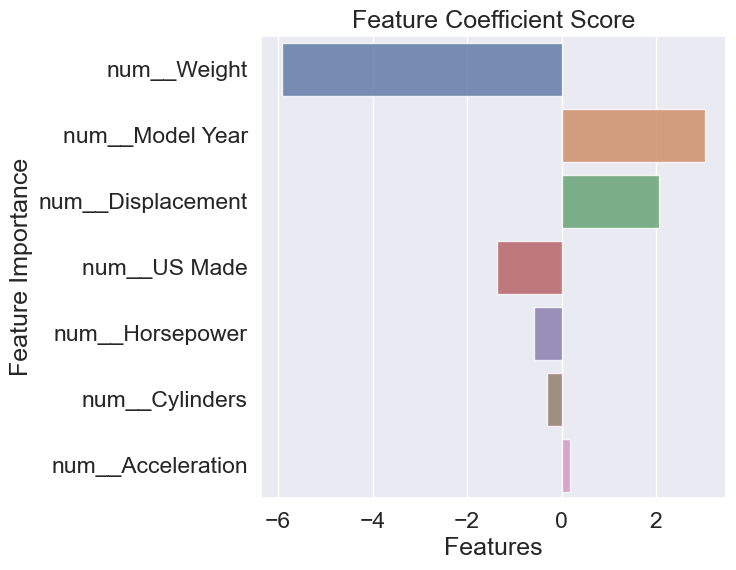

In [101]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
sns.barplot(feat_importances[0:20].coef,feat_importances[0:20].Feature_Name,alpha=0.8)
plt.title('Feature Coefficient Score')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

## Feature selection

In [181]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [182]:
sfs = sfs(regression, k_features='parsimonious', forward=True, verbose=2, scoring='r2')

In [183]:
sfs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-01-22 22:40:58] Features: 1/7 -- score: 0.6738456460339813[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-01-22 22:40:58] Features: 2/7 -- score: 0.7983366551432298[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-01-22 22:40:58] Features: 3/7 -- score: 0.8066171586121271[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(),
                          k_features='parsimonious', scoring='r2', verbose=2)

In [184]:
sfs.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.70257849, 0.6528851 , 0.70172404, 0.67577548, 0.63626512]),
  'avg_score': 0.6738456460339813,
  'feature_names': ('3',)},
 2: {'feature_idx': (3, 5),
  'cv_scores': array([0.84259294, 0.78167987, 0.80144984, 0.77411329, 0.79184735]),
  'avg_score': 0.7983366551432298,
  'feature_names': ('3', '5')},
 3: {'feature_idx': (3, 5, 6),
  'cv_scores': array([0.83327532, 0.78956748, 0.82583924, 0.78927602, 0.79512773]),
  'avg_score': 0.8066171586121271,
  'feature_names': ('3', '5', '6')},
 4: {'feature_idx': (3, 4, 5, 6),
  'cv_scores': array([0.83184619, 0.79008692, 0.82459977, 0.78926306, 0.79494671]),
  'avg_score': 0.8061485293635705,
  'feature_names': ('3', '4', '5', '6')},
 5: {'feature_idx': (1, 3, 4, 5, 6),
  'cv_scores': array([0.83640198, 0.79570642, 0.82748989, 0.79741204, 0.77683519]),
  'avg_score': 0.8067691054021708,
  'feature_names': ('1', '3', '4', '5', '6')},
 6: {'feature_idx': (1, 2, 3, 4, 5, 6),
  'cv_scores': array([0

In [185]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.7025784928585195, 0.6528851031744258, 0.701...",0.673846,"(3,)",0.033802,0.026299,0.013149
2,"(3, 5)","[0.8425929358217655, 0.7816798685706967, 0.801...",0.798337,"(3, 5)",0.030818,0.023978,0.011989
3,"(3, 5, 6)","[0.8332753160890425, 0.7895674811387177, 0.825...",0.806617,"(3, 5, 6)",0.024411,0.018992,0.009496
4,"(3, 4, 5, 6)","[0.8318461862952005, 0.7900869206621353, 0.824...",0.806149,"(3, 4, 5, 6)",0.023485,0.018272,0.009136
5,"(1, 3, 4, 5, 6)","[0.836401979206454, 0.7957064221981635, 0.8274...",0.806769,"(1, 3, 4, 5, 6)",0.028238,0.02197,0.010985
6,"(1, 2, 3, 4, 5, 6)","[0.8375620613775316, 0.7966550308387051, 0.824...",0.806636,"(1, 2, 3, 4, 5, 6)",0.027464,0.021368,0.010684
7,"(0, 1, 2, 3, 4, 5, 6)","[0.8379639071233822, 0.7970478477108327, 0.820...",0.806226,"(0, 1, 2, 3, 4, 5, 6)",0.026735,0.0208,0.0104


## Final Model

In [186]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

In [203]:
lr = LinearRegression()
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

lr.fit(X_train_sfs, y_train)
y_predt = lr.predict(X_test_sfs)

k = len(sfs.k_feature_names_)
n = X_train.shape[0]
r2 = sfs.k_score_
adj_r2 = 1 - (1 - sfs.k_score_) * ((n - 1) / (n - k - 1))

print(f'TRAIN R2: {r2}')
print(f'TRAIN ADJUSTED R2: {adj_r2}')
print(f'TEST R2: {r2_score(y_test, y_predt)}')
print(f'k: {k}')
print(list(sfs.k_feature_names_))

TRAIN R2: 0.8066171586121271
TRAIN ADJUSTED R2: 0.8047695518472748
TEST R2: 0.8387891635040223
k: 3
['3', '5', '6']


In [189]:
import sklearn.metrics as metrics
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('Overall model accuracy: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [205]:
regression_results(y_test, y_predt)

explained_variance:  0.8388
mean_squared_log_error:  0.0231
Overall model accuracy:  0.8388
MAE:  2.2943
MSE:  8.6677
RMSE:  2.9441


In [209]:
X = df[['Weight','Model Year','US Made']]
y = df[['MPG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lr = sm.add_constant(X_train) 
lr_model = sm.OLS(y_train, lr) 
lr_fit = lr_model.fit()
print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     463.8
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          5.32e-115
Time:                        23:07:30   Log-Likelihood:                -834.10
No. Observations:                 318   AIC:                             1676.
Df Residuals:                     314   BIC:                             1691.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6397      4.433     -3.979      0.0